In [ ]:
!pip install ace_tools
!pip install imblearn
!pip install keras-tuner --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau # Import ReduceLROnPlateau
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2 # Import l1_l2
#import ace_tools as tools
from sklearn.metrics import accuracy_score # Import the accuracy_score function
from sklearn.metrics import accuracy_score # This line imports the accuracy_score function.
from tensorflow.keras import layers # Import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Import the 'random' module
import random

# set random seeds to get reproducible results
import os
seed = 100
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [ ]:
# load the data set
df_train = pd.read_csv('https://drive.google.com/uc?export=download&id=1id1l2rdekEZ3cEJNFsg4wvS2MMy8_vg3')
df_test= pd.read_csv('https://drive.google.com/uc?export=download&id=1aCDbsuXZlWlGF7uizSIDaTLS7_8S5W9H')

#### **2.0. Exploratory Data Analysis**

In [ ]:
# Number of entries
len(df_train)
print(f'Number of entries: {len(df_train)}')

Number of entries: 668


The training dataset contains 668 entries for train.

In [ ]:
# Number of entries
len(df_test)
print(f'Number of entries: {len(df_test)}')

Number of entries: 100


The training dataset contains 100 entries for test.

In [ ]:
df_train.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_test.head()

,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [ ]:
# Get the shape of the DataFrame
df_train.shape

(668, 10)

The dataframe df_train contains 668 rows and 10 columns.

In [ ]:
# Get the shape of the DataFrame
df_test.shape

(100, 9)

The dataframe df_test contains 100 rows and 9 columns.

In [ ]:
# Display the summary of the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [ ]:
# Generate descriptive statistics of the DataFrame
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,668.0,334.500000,192.979273,1.000,167.75000,334.500,501.25000,668.00
A1,668.0,3.812874,3.365672,0.000,1.00000,3.000,6.00000,17.00
A2,668.0,120.405689,32.291473,0.000,99.00000,116.000,140.00000,199.00
A3,668.0,68.748503,19.526392,0.000,64.00000,72.000,80.00000,122.00
A4,668.0,20.567365,16.020600,0.000,0.00000,23.000,32.00000,99.00
A5,668.0,79.654192,115.827750,0.000,0.00000,36.500,126.00000,846.00
A6,668.0,31.860180,7.827111,0.000,27.10000,32.000,36.50000,67.10
A7,668.0,0.477329,0.341398,0.078,0.23875,0.377,0.64125,2.42
A8,668.0,33.091317,11.711386,21.000,24.00000,29.000,40.00000,81.00
class,668.0,0.345808,0.475988,0.000,0.00000,0.000,1.00000,1.00


In [ ]:
# Generate descriptive statistics of the DataFrame
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.75000,50.500,75.2500,100.000
A1,100.0,4.06000,3.404750,0.000,1.00000,3.000,6.0000,13.000
A2,100.0,124.16000,29.700770,56.000,101.75000,121.500,141.2500,195.000
A3,100.0,71.49000,18.087048,0.000,62.00000,74.000,82.0000,114.000
A4,100.0,20.33000,15.564824,0.000,0.00000,23.500,32.0000,49.000
A5,100.0,80.77000,111.827777,0.000,0.00000,0.000,142.5000,510.000
A6,100.0,32.87700,8.241259,0.000,28.40000,32.800,36.9750,57.300
A7,100.0,0.43545,0.252403,0.118,0.25875,0.355,0.5705,1.182
A8,100.0,34.24000,12.094009,21.000,24.00000,30.500,43.0000,69.000


<Axes: xlabel='class', ylabel='count'>

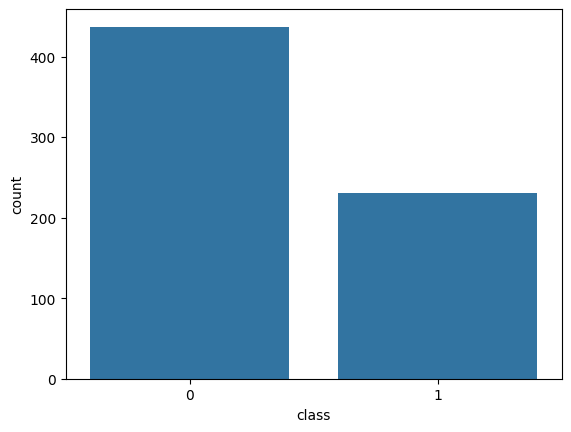

In [ ]:
# Summarise class details
sns.countplot(x=df_train['class'])

In [ ]:
# Count each unique value in the Class
df_train['class'].value_counts()

,count
class,
0,437
1,231


The target variable 'class' has an imbalanced distribution, with 437 instances of class 0 and 231 instances of class 1 (1 =  tested positive for diabetes)

In [ ]:
# display the total number of missing values
df_train.isnull().sum()

,0
id,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
class,0


No missing numbers in the columns

In [ ]:
# display the total number of missing values
df_test.isnull().sum()

,0
id,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0


No missing numbers in the columns

In [ ]:
# find the correlation between all features and the class
df_train.corr()['class']

,class
id,-0.075203
A1,0.227623
A2,0.453792
A3,0.051311
A4,0.089051
A5,0.150839
A6,0.312034
A7,0.189743
A8,0.231002
class,1.000000


The correlation analysis shows the relationship between each feature and the 'class' variable, with 'A2' having the strongest positive correlation (0.45).

In [ ]:
# display the number of unique values
df_train.nunique()

,0
id,668
A1,17
A2,131
A3,46
A4,51
A5,176
A6,239
A7,473
A8,51
class,2


The features 'A2', 'A5', 'A6', and 'A7' show higher variability compared to the other features.

In [ ]:
# display the number of unique values
df_test.nunique()

,0
id,100
A1,14
A2,69
A3,29
A4,30
A5,38
A6,79
A7,97
A8,36


The features 'A2', 'A5' and 'A6' show higher variability compared to the other features.

In [ ]:
# print the number of unique values in a fields
for col in df_train.columns:
    if col != 'id' and col != 'class':  # Use 'and' for multiple conditions
        print(f"Unique values in {col} are: {df_train[col].nunique()} , {df_train[col].unique()}")

Unique values in A1 are: 17 , [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Unique values in A2 are: 131 , [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199]
Unique values in A3 are: 46 , [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106]
Unique values in A4 are: 51 , [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 5

In [ ]:
# print the number of unique values in a fields
for col in df_test.columns:
    if col != 'id' and col != 'class':  # Use 'and' for multiple conditions
        print(f"Unique values in {col} are: {df_train[col].nunique()} , {df_train[col].unique()}")

Unique values in A1 are: 17 , [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Unique values in A2 are: 131 , [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199]
Unique values in A3 are: 46 , [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106]
Unique values in A4 are: 51 , [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 5

In [ ]:
# check duplicate number
df_train.duplicated().sum()

0

There are no duplicate rows in the df_train dataframe.

In [ ]:
# check duplicate number
df_test.duplicated().sum()

0

There are no duplicate rows in the df_test dataframe.

In [ ]:
# check datatype in the dataframe
df_train.dtypes

,0
id,int64
A1,int64
A2,int64
A3,int64
A4,int64
A5,int64
A6,float64
A7,float64
A8,int64
class,int64


The df_train dataframe contains a mix of data types: integer types (int64) and floating-point types (float64).

In [ ]:
# check datatype in the dataframe
df_test.dtypes

,0
id,int64
A1,int64
A2,int64
A3,int64
A4,int64
A5,int64
A6,float64
A7,float64
A8,int64


The df_test dataframe contains a mix of data types: integer types (int64) and floating-point types (float64).

In [ ]:
#  find the count of the most frequent values
def find_most_frequent_values(df):

    frequent_values = {}
    for column_name in df.columns:
        mode = df[column_name].mode()[0]  # Get the most frequent value
        count = df[column_name].value_counts()[mode]  # Get the count of the mode
        frequent_values[column_name] = (mode, count)
    return frequent_values

In [ ]:
# passing the dataframe
frequent_values_result = find_most_frequent_values(df_train)

In [ ]:
# Print the results
for column_name, (mode, count) in frequent_values_result.items():
    print(f"Column '{column_name}': Mode = {mode}, Count = {count}")

Column 'id': Mode = 1, Count = 1
Column 'A1': Mode = 1, Count = 116
Column 'A2': Mode = 100, Count = 16
Column 'A3': Mode = 70, Count = 50
Column 'A4': Mode = 0, Count = 196
Column 'A5': Mode = 0, Count = 322
Column 'A6': Mode = 31.6, Count = 12
Column 'A7': Mode = 0.254, Count = 6
Column 'A8': Mode = 21, Count = 58
Column 'class': Mode = 0, Count = 437


In [ ]:
# passing the dataframe
frequent_values_result = find_most_frequent_values(df_test)

In [ ]:
# Print the results
for column_name, (mode, count) in frequent_values_result.items():
    print(f"Column '{column_name}': Mode = {mode}, Count = {count}")

Column 'id': Mode = 1, Count = 1
Column 'A1': Mode = 1, Count = 19
Column 'A2': Mode = 121, Count = 4
Column 'A3': Mode = 78, Count = 10
Column 'A4': Mode = 0, Count = 31
Column 'A5': Mode = 0, Count = 52
Column 'A6': Mode = 28.4, Count = 4
Column 'A7': Mode = 0.261, Count = 2
Column 'A8': Mode = 22, Count = 14


In [ ]:
# check for columns with zeros, excluding 'id' and 'class':
columns_with_zeros = [col for col in df_train.columns
                      if (df_train[col] == 0).any() and col not in ['id', 'class']]

print("Columns with zeros:", columns_with_zeros)

Columns with zeros: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6']


In [ ]:
# check for columns with zeros, excluding 'id' and 'class':
columns_with_zeros = [col for col in df_test.columns
                      if (df_test[col] == 0).any() and col not in ['id', 'class']]

print("Columns with zeros:", columns_with_zeros)

Columns with zeros: ['A1', 'A3', 'A4', 'A5', 'A6']


In [ ]:
#  identify columns with outliers in your DataFrame df_train
def identify_outlier_columns(df):
    outlier_columns = []
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if the column has outliers
        if ((df[column] < lower_bound) | (df[column] > upper_bound)).sum() > 0:
            outlier_columns.append(column)

    return outlier_columns

In [ ]:
# Get list of columns with outliers for train outlier
columns_with_outliers = identify_outlier_columns(df_train)
print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8']


In [ ]:
# Get list of columns with outliers for test dataframe
columns_with_outliers = identify_outlier_columns(df_test)
print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['A3', 'A5', 'A6', 'A7']


In [ ]:
# Count zero values in each column
zero_counts = (df_train == 0).sum()
print(zero_counts)

id         0
A1       102
A2         5
A3        32
A4       196
A5       322
A6         9
A7         0
A8         0
class    437
dtype: int64


In [ ]:
# Count zero values in each column
zero_counts = (df_test == 0).sum()
print(zero_counts)

id     0
A1     9
A2     0
A3     3
A4    31
A5    52
A6     2
A7     0
A8     0
dtype: int64


* Boxplot of Features Showing Outliers for train

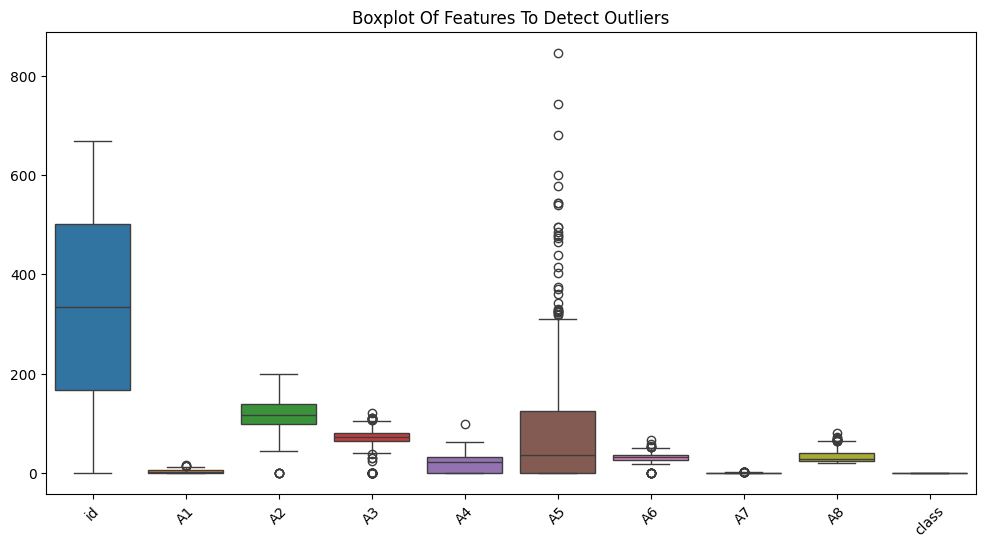

In [ ]:
# Plot boxplots for each feature for train
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train)
plt.xticks(rotation=45)
plt.title("Boxplot Of Features To Detect Outliers")
plt.show()

This boxplot shows the distribution of features and highlights the presence of outliers. Features like A5 and A2 have many extreme values. Outliers are visible as points beyond the whiskers, suggesting the need for outlier handling.

* Boxplot of Features Showing Outliers for train

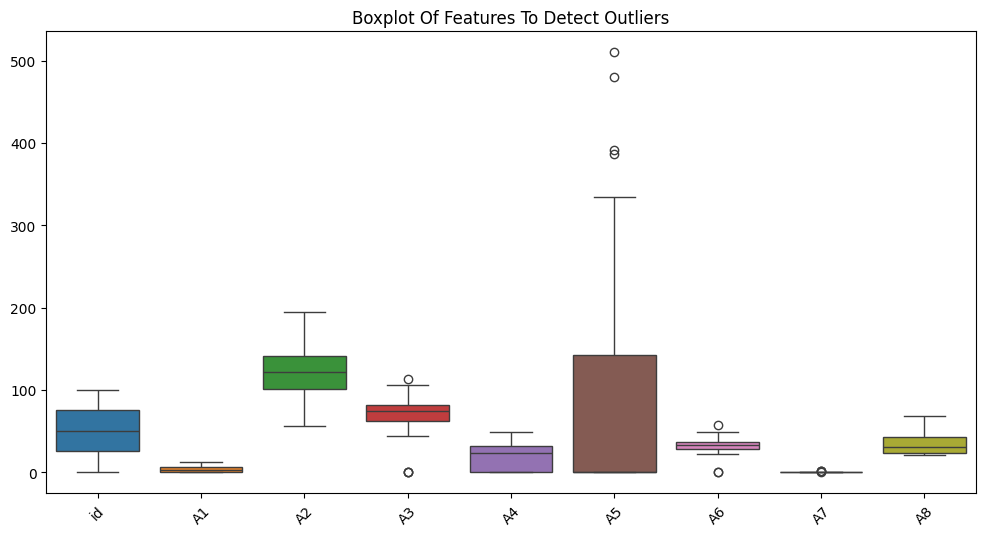

In [ ]:
# Plot boxplots for each feature for test
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_test)
plt.xticks(rotation=45)
plt.title("Boxplot Of Features To Detect Outliers")
plt.show()

This boxplot displays the distribution and outliers for each feature. Features like A2, A3, and A5 show noticeable outliers. The presence of these extreme values suggests the need for outlier treatment to improve model performance.

* Feature Distributions by Class

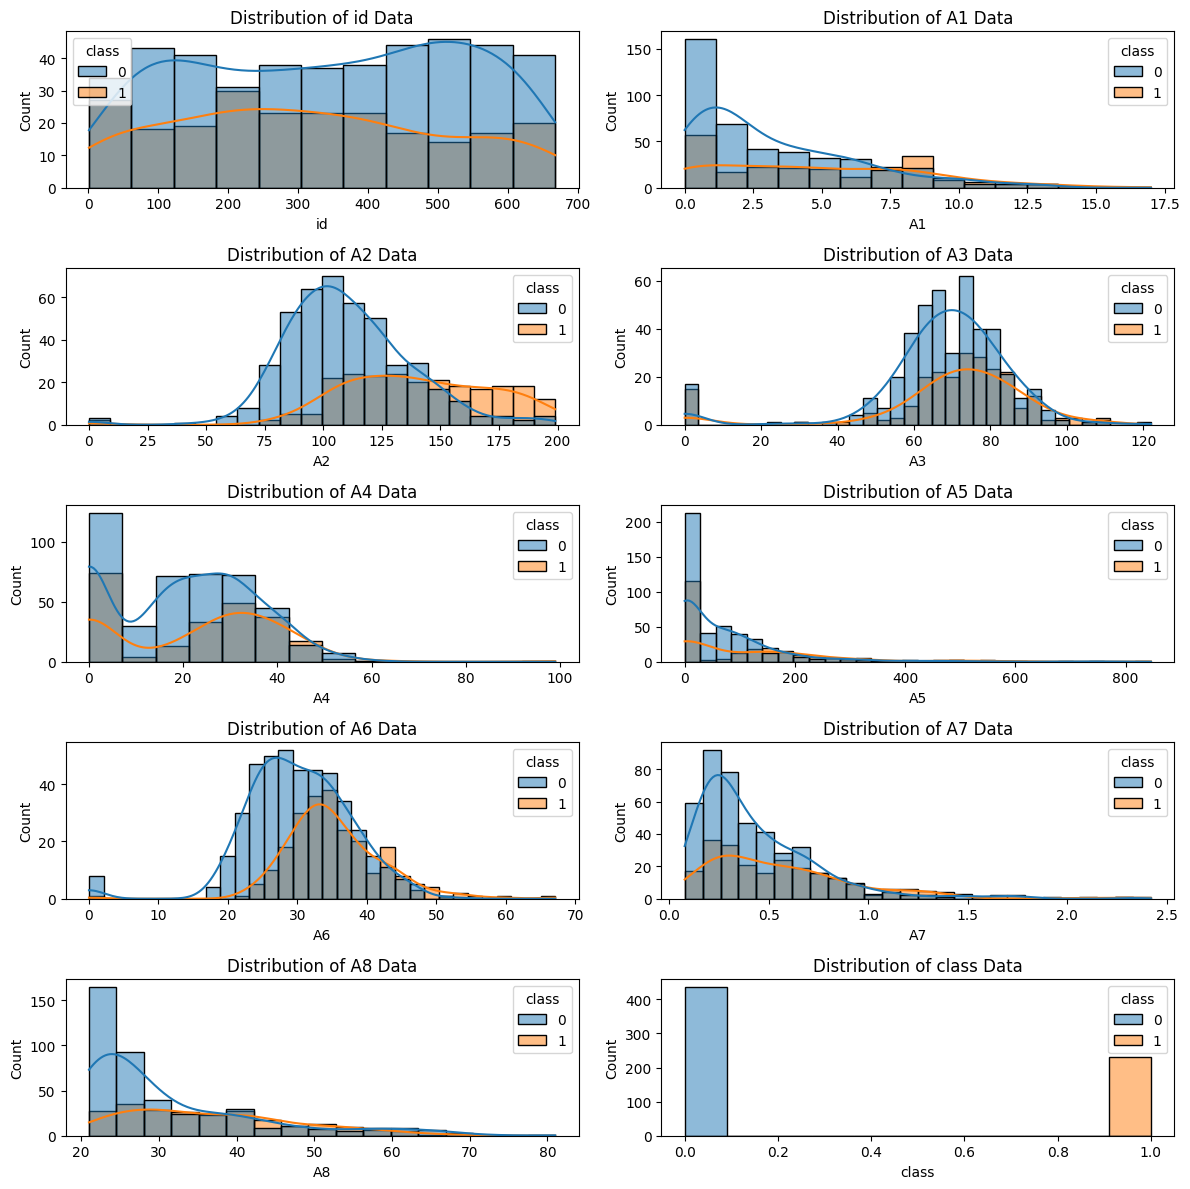

In [ ]:
plt.figure(figsize=(12,12))
num_row=1
for col in df_train.columns:
    plt.subplot(5,2,num_row)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(x=df_train[col],kde=True,hue=df_train['class'])
    plt.tight_layout()
    num_row=num_row+1
plt.show()

The charts show how each feature is spread in the data. Some features have many zeros and outliers. Class 0 has more samples than class 1. This means the data needs cleaning before building a model.

* Pair Plot of Feature Relationships by Class

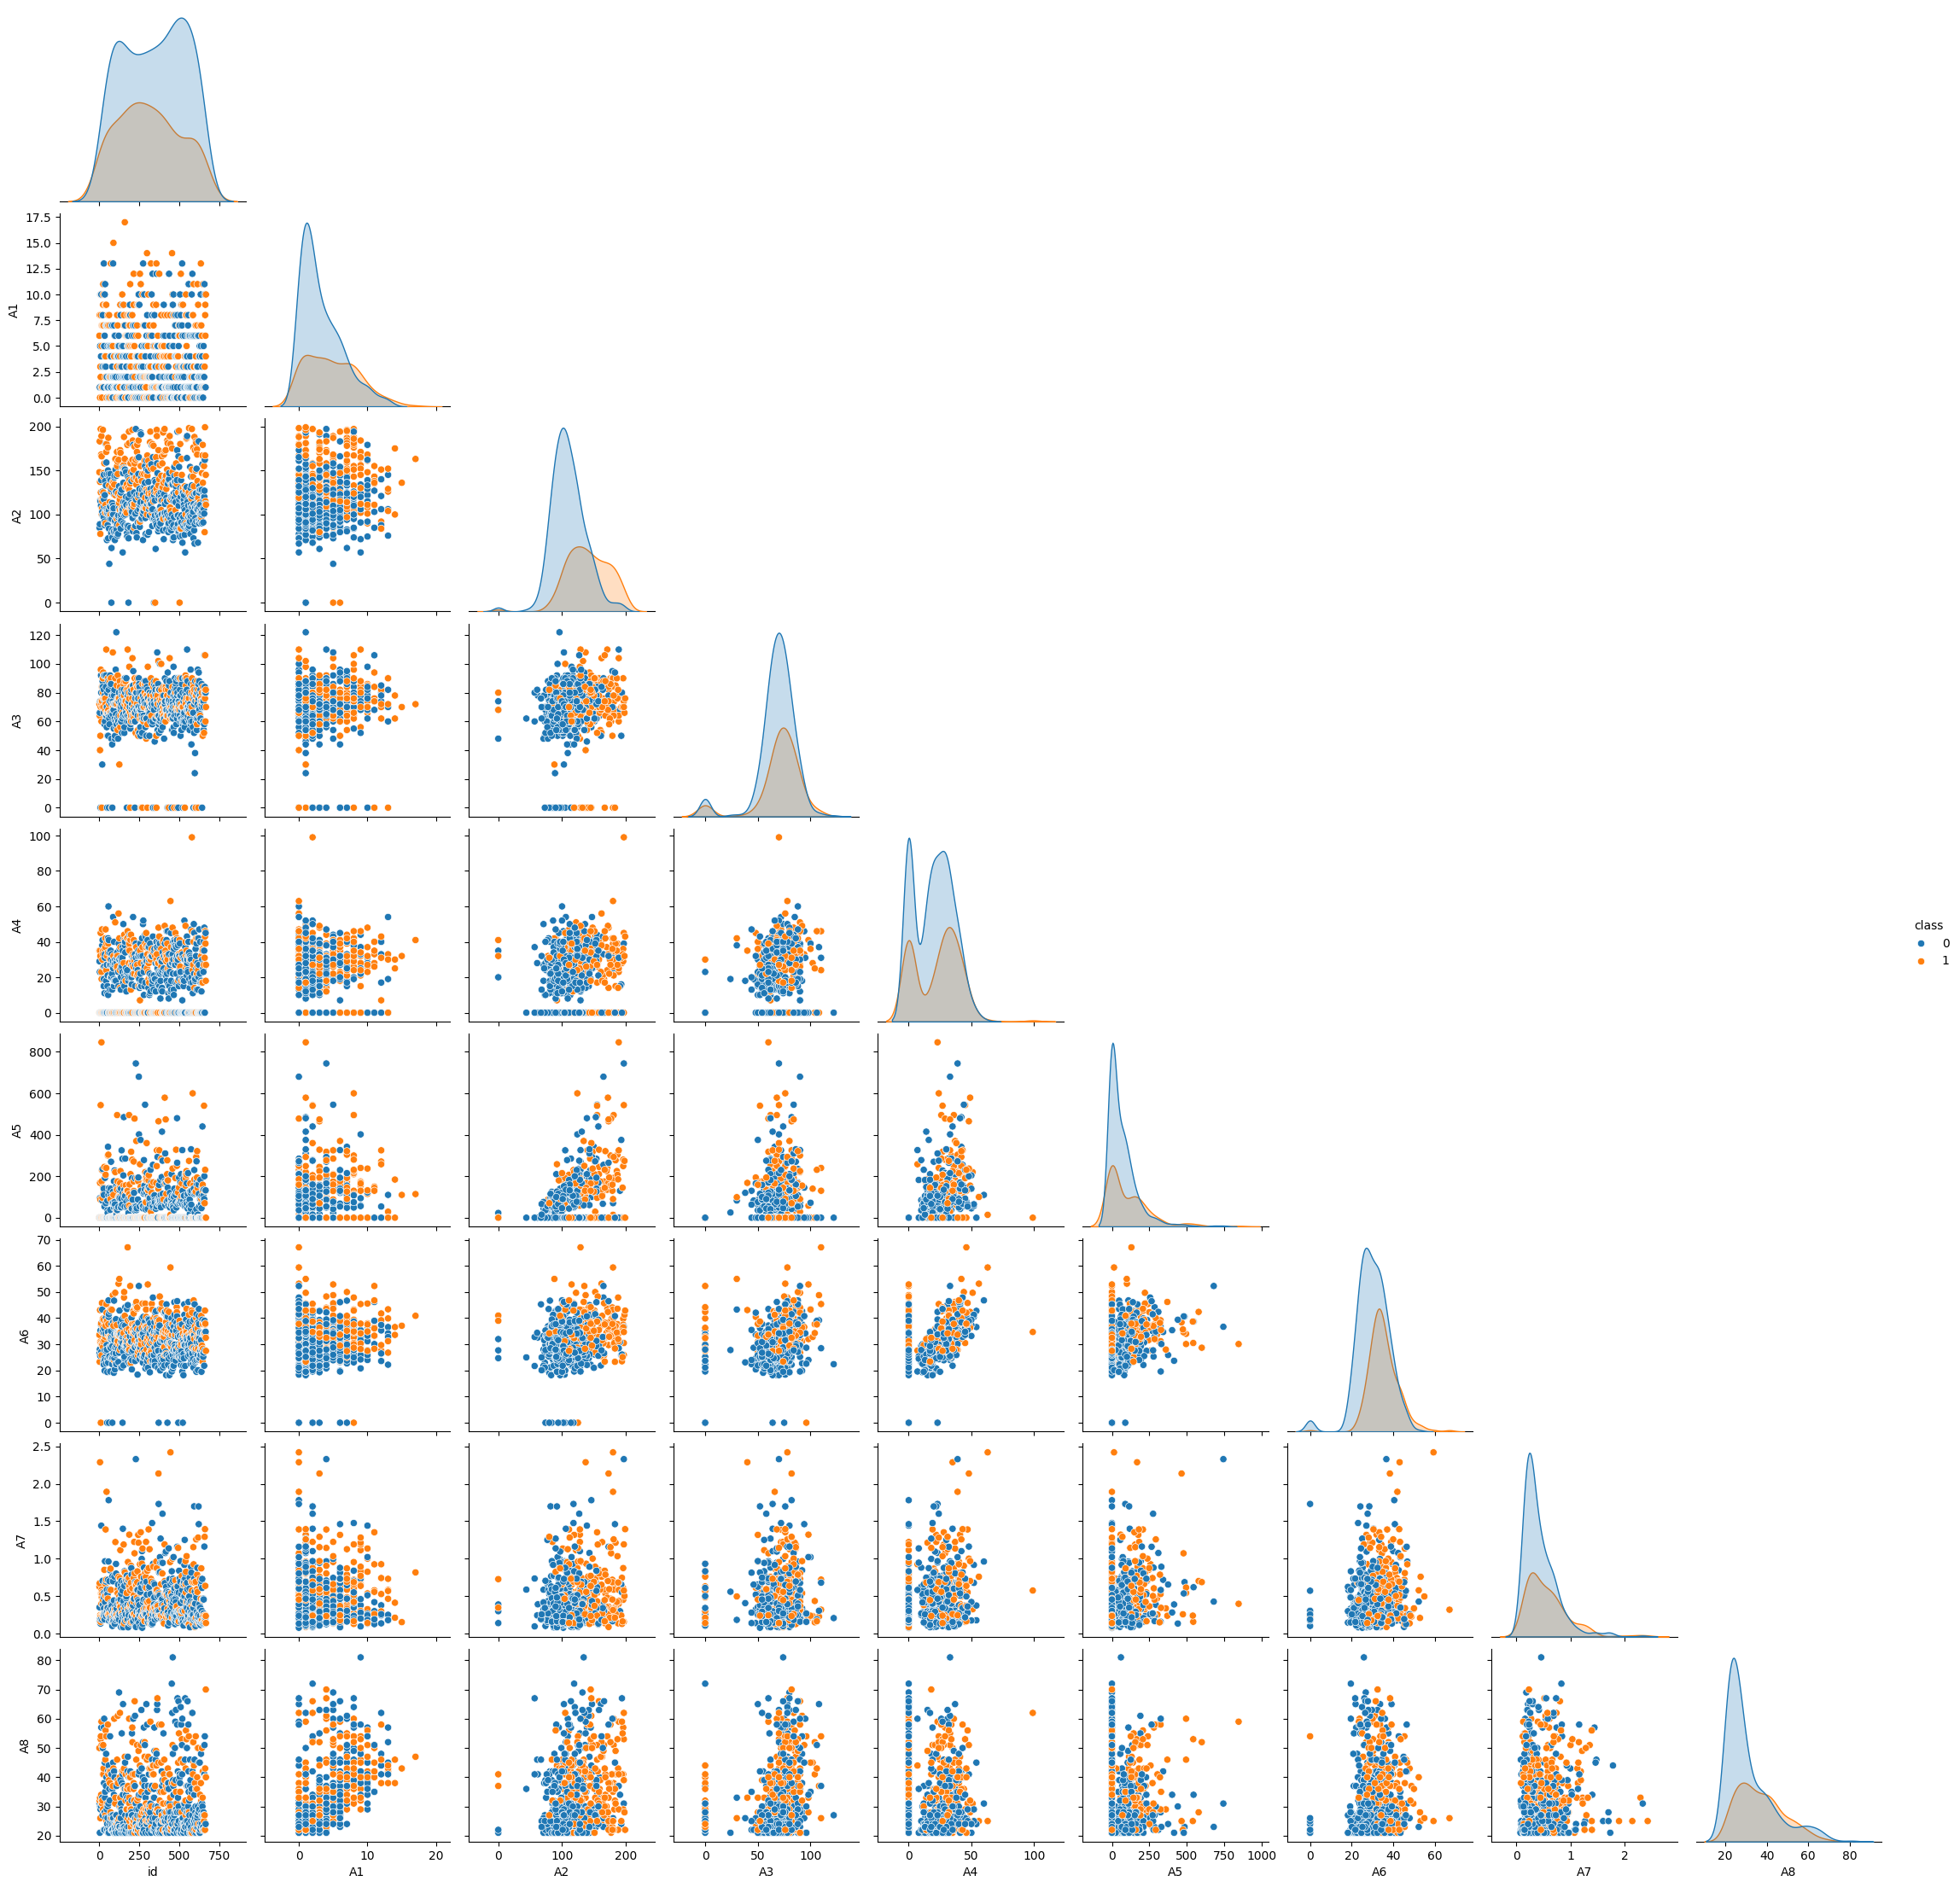

In [ ]:
sns.pairplot(df_train,hue='class',corner=True)
plt.show()

The diagonal plots show the distribution of each feature by class. It highlights how features vary between class 0 and class 1. Some features show patterns, while others are scattered.



* Feature Correlation Heatmap

<Axes: >

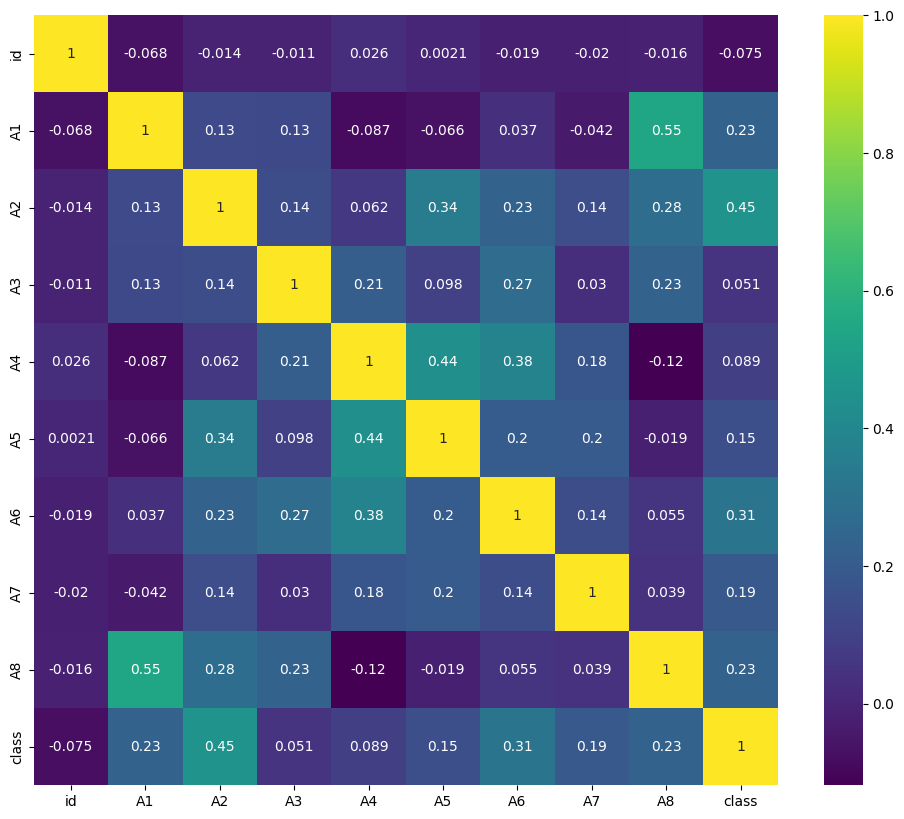

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,cmap='viridis')

This heatmap shows the correlation between different features in the dataset. Most features have weak correlations with each other. A2, A4, and A5 show moderate positive correlations. The class label has its strongest correlation with A2 and A6.

#### **3.0. Data Preprocessing**

* Domain Knowledge: Zeros are invalid for these features (except A1 and A7):

* Option 1 Method 1

* Direct replace zeros in the specified columns with the mean

In [ ]:
def replace_with_mean(df, value, value_at):
    """Replaces zeros in a column with the mean value based on class."""

    # Calculate mean for each class (excluding zeros)
    class_means = df.loc[df[value] != 0, [value, value_at]].groupby(value_at)[value].mean()

    # Replace zeros with class-specific means
    for class_val, mean_val in class_means.items():
        df.loc[(df[value] == 0) & (df[value_at] == class_val), value] = mean_val

# Run the function for specified columns
for col in ['A2', 'A3', 'A4', 'A5', 'A6']:
    replace_with_mean(df_train, col, 'class')

<ipython-input-69-af597181a64b>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '110.5184331797235' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[value] == 0) & (df[value_at] == class_val), value] = mean_val
<ipython-input-69-af597181a64b>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70.77380952380952' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[value] == 0) & (df[value_at] == class_val), value] = mean_val
<ipython-input-69-af597181a64b>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.181528662420384' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[value] == 0) & (df[value_a

* Option 1 Method 2

* Direct replace zeros in the specified columns with the median

In [ ]:
def replace_with_median(df, value, value_at):
    """Replaces zeros in a column with the median value based on class."""

    # Calculate median for each class (excluding zeros)
    class_medians = df.loc[df[value] != 0, [value, value_at]].groupby(value_at)[value].median()

    # Replace zeros with class-specific medians
    for class_val, median_val in class_medians.items():
        df.loc[(df[value] == 0) & (df[value_at] == class_val), value] = median_val

# Run the function for specified columns
for col in ['A2', 'A3', 'A4', 'A5', 'A6']:
    replace_with_median(df_train, col, 'class')

* Option 1 of Method 3

*  KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

# Define the columns with invalid zeros
cols_with_invalid_zeros = ['A2', 'A3', 'A4', 'A5', 'A6']  # Replace with your actual columns

imputer = KNNImputer(n_neighbors=5)
df_train[cols_with_invalid_zeros] = imputer.fit_transform(df_train[cols_with_invalid_zeros])
df_test[cols_with_invalid_zeros] = imputer.fit_transform(df_test[cols_with_invalid_zeros])

* Option 2 of Method 1

* Handle Outliers (Winsorization or Capping)

In [ ]:
from scipy.stats.mstats import winsorize

# Example on A2 (Glucose)
df_train['A2'] = winsorize(df_train['A2'], limits=[0.05, 0.05])
df_train['A3'] = winsorize(df_train['A3'], limits=[0.05, 0.05])
df_train['A4'] = winsorize(df_train['A4'], limits=[0.05, 0.05])
df_train['A5'] = winsorize(df_train['A5'], limits=[0.05, 0.05])
df_train['A6'] = winsorize(df_train['A6'], limits=[0.05, 0.05])

# Repeat for other features prone to outliers

df_test['A2'] = winsorize(df_test['A2'], limits=[0.05, 0.05])
df_test['A3'] = winsorize(df_test['A3'], limits=[0.05, 0.05])
df_test['A4'] = winsorize(df_test['A4'], limits=[0.05, 0.05])
df_test['A5'] = winsorize(df_test['A5'], limits=[0.05, 0.05])
df_test['A6'] = winsorize(df_test['A6'], limits=[0.05, 0.05])


* Option 2 Method 2

* Handle Outliers IQR capping

In [ ]:
def cap_outliers(df, column):
    # Convert to a standard NumPy array
    col_values = np.array(df[column])
    Q1 = np.nanpercentile(col_values, 25)
    Q3 = np.nanpercentile(col_values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Use np.clip on the standard array, then assign it back
    df[column] = np.clip(col_values, lower_bound, upper_bound)

# Define the columns to process
cols_with_invalid_zeros = ['A2', 'A3', 'A4', 'A5', 'A6']

In [ ]:
# Apply on specified columns in df_train
for col in cols_with_invalid_zeros:
    cap_outliers(df_train, col)

In [ ]:
# Apply on specified columns in df_test
for col in cols_with_invalid_zeros:
    cap_outliers(df_test, col)

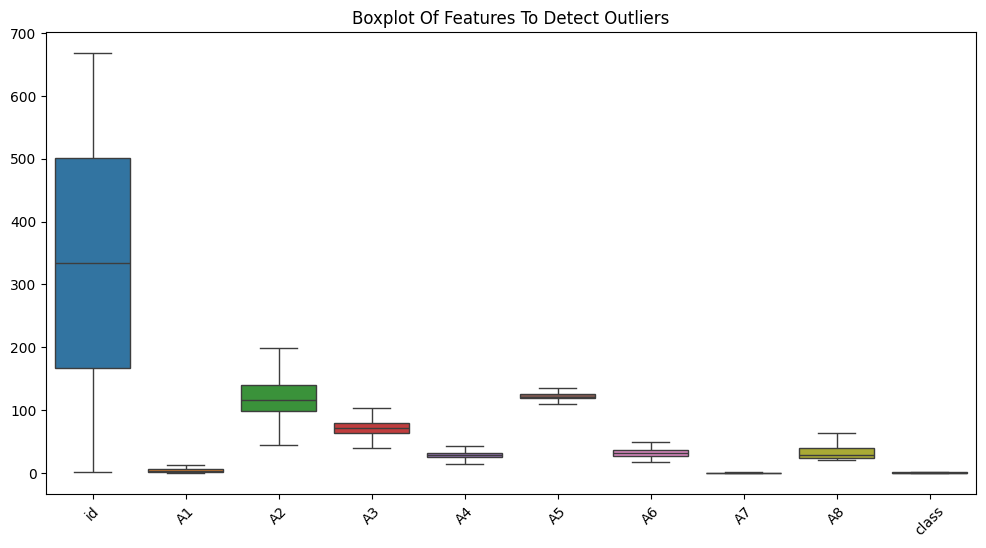

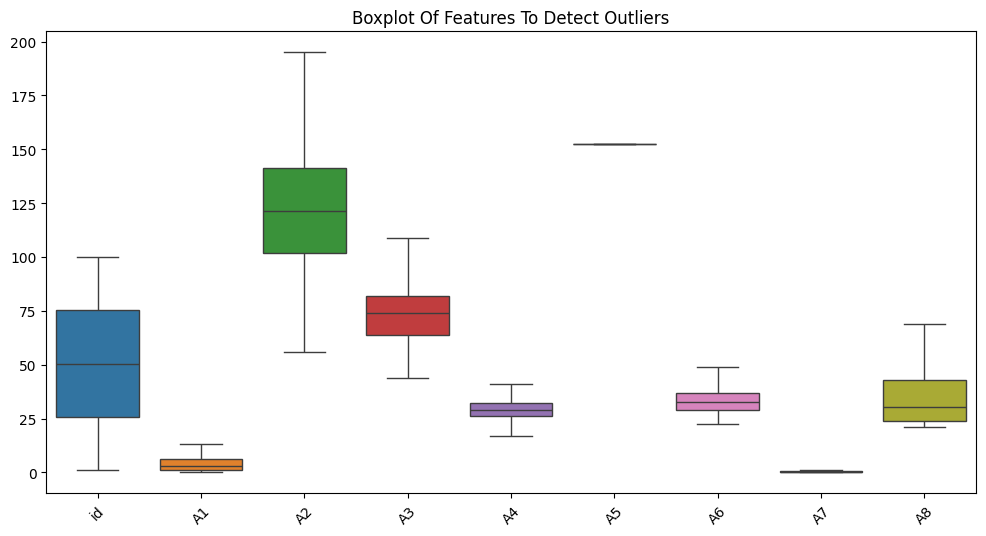

In [ ]:
# Plot boxplots for each feature for train
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train)
plt.xticks(rotation=45)
plt.title("Boxplot Of Features To Detect Outliers")
plt.show()

# Plot boxplots for each feature for train
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_test)
plt.xticks(rotation=45)
plt.title("Boxplot Of Features To Detect Outliers")
plt.show()

**Feature Extraction**

* Feature and Target Extraction

In [ ]:
y = df_train['class']
X = df_train.drop(columns=['id', 'class'])
X_test = df_test.drop(columns=['id'])

y = pd.Series(y)
print(y.value_counts())

class
0    437
1    231
Name: count, dtype: int64


In [ ]:
# # create LabelEncoder for labels
le = LabelEncoder()
le.fit(y)

LabelEncoder()

* Feature Scaling

In [ ]:

# # Step 7: Feature Scaling
# from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler if you haven't already

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

**Handle Class Imbalance**

* RandomOverSampler

In [ ]:
oversample = RandomOverSampler(random_state=seed)
X_resampled, y_resampled = oversample.fit_resample(X, y)

* SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
oversample = SMOTE(random_state=seed)  # Replace RandomOverSampler with SMOTE

# Apply SMOTE to resample the data
X_resampled, y_resampled = oversample.fit_resample(X, y)

**Split Data (Train / Validation)**

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=seed, stratify=y_resampled)

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

# # Train-Test split on balanced data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

print(y_train.value_counts())
print(y_val.value_counts())
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

class
0    349
1    185
Name: count, dtype: int64
class
0    88
1    46
Name: count, dtype: int64
(534, 8) (534,)
(134, 8) (134,)


In [ ]:
# # Split data into training and validation sets (70%-30%)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
# print(y_train.value_counts())
# print(y_val.value_counts())
# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)

0    306
1    161
Name: count, dtype: int64
0    131
1     70
Name: count, dtype: int64
(467, 8) (467,)
(201, 8) (201,)


**Feature Scaling (Standardization or MinMax Scaling)**

* MinMax Scaling

In [ ]:
# scaler = MinMaxScaler()  # Or StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

* Standardization

In [ ]:
# Feature Scaling (Standardization)
scaler = StandardScaler()  # Using StandardScaler now
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

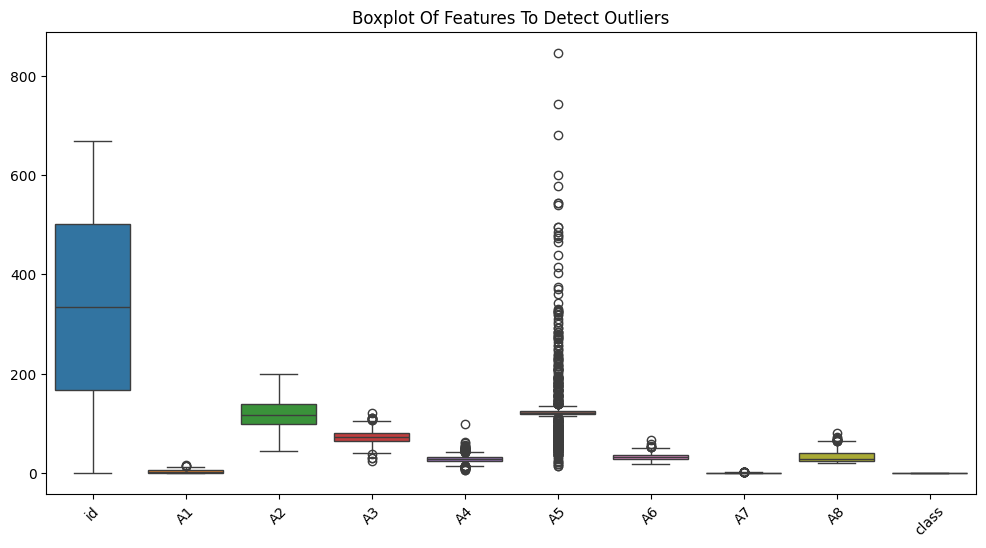

In [ ]:
# Plot boxplots for each feature for train
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train)
plt.xticks(rotation=45)
plt.title("Boxplot Of Features To Detect Outliers")
plt.show()

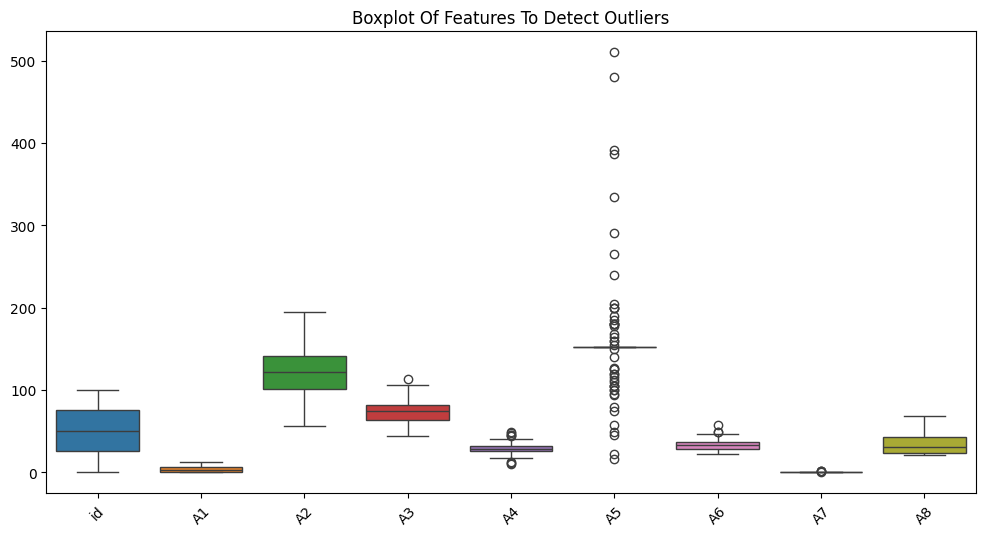

In [ ]:
# Plot boxplots for each feature for train
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_test)
plt.xticks(rotation=45)
plt.title("Boxplot Of Features To Detect Outliers")
plt.show()

In [ ]:
# Save the train cleaned dataset
df_train.to_csv("df_train_cleaned.csv", index=False)

In [ ]:
# Save the test cleaned dataset
df_test.to_csv("df_test_cleaned.csv", index=False)

### **Model Training and Prediction**

In [ ]:
from tensorflow.keras import backend as K

# Clear session to free memory
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow)


In [ ]:
# Build model
# model1 = Sequential()
# model1.add(layers.Dense(128, input_dim=8, activation='relu'))
# model1.add(layers.BatchNormalization())
# model1.add(layers.Dropout(0.3))

# model1.add(layers.Dense(64, activation='relu'))
# model1.add(layers.BatchNormalization())
# model1.add(layers.Dropout(0.3))

# model1.add(layers.Dense(1, activation='sigmoid'))

model1 = Sequential()
model1.add(Dense(32, input_dim=8, activation='swish', kernel_regularizer=l1_l2(l1=0.000287,l2=0.00174)))
model1.add(Dropout(0.40))
model1.add(Dense(24, activation='relu'))
model1.add(Dropout(0.31))
model1.add(Dense(24, activation='swish'))
model1.add(Dropout(0.32))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,705 (6.66 KB)

 Trainable params: 1,705 (6.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model1.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Callbacks
#early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# # Train
# history1 = model1.fit(
#     X_train_scaled, y_train,
#     #batch_size=30, epochs=60,
#     batch_size=32, epochs=100,
#     validation_data=(X_val_scaled, y_val),
#     #callbacks=[early_stop, reduce_lr]
#)
# Compile model
#model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Callbacks
#early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train
history1 = model1.fit(
    X_train_scaled, y_train,
    #batch_size=30, epochs=60,
    batch_size=32, epochs=100,
    validation_data=(X_val_scaled, y_val),
    #callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.6339 - loss: 0.6808 - val_accuracy: 0.7313 - val_loss: 0.6338
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7055 - loss: 0.6258 - val_accuracy: 0.7463 - val_loss: 0.5908
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7042 - loss: 0.6041 - val_accuracy: 0.7836 - val_loss: 0.5590
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7285 - loss: 0.5629 - val_accuracy: 0.7910 - val_loss: 0.5377
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7266 - loss: 0.5428 - val_accuracy: 0.7985 - val_loss: 0.5236
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7460 - loss: 0.5179 - val_accuracy: 0.7985 - val_loss: 0.5135
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7512 - loss: 0.5298 - val_accuracy: 0.7836 - val_loss: 0.5073
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7332 - loss: 0.5502 - val_accuracy: 0.7910 -

In [ ]:
# # Define a function for dropout scheduling
# def dropout_scheduler(epoch, lr):
#   if epoch < 10:
#     return 0.4  # Higher dropout rate in early epochs
#   elif epoch < 20:
#     return 0.3  # Gradually decrease dropout rate
#   else:
#     return 0.2  # Lower dropout rate in later epochs

# # Build model
# model1 = Sequential()
# model1.add(Dense(32, input_dim=8, activation='swish', kernel_regularizer=l1_l2(l1=0.000287, l2=0.00174)))
# model1.add(Dropout(0.40))  # Initial dropout rate
# model1.add(Dense(24, activation='relu'))
# model1.add(Dropout(0.31))
# model1.add(Dense(24, activation='swish'))
# model1.add(Dropout(0.32))
# model1.add(Dense(1, activation='sigmoid'))
# model1.summary()

# # Compile model
# model1.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# # Callbacks
# early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
# dropout_schedule = LearningRateScheduler(dropout_scheduler, verbose=1)  # Add dropout scheduling

# # Train with dropout scheduling
# history1 = model1.fit(
#     X_train_scaled, y_train,
#     batch_size=32, epochs=100,
#     validation_data=(X_val_scaled, y_val),
#     callbacks=[early_stop, reduce_lr, dropout_schedule]
# )

**Validate Model**

In [ ]:
# get model predictions
y_pred1 = model1.predict(X_val_scaled)
print(y_pred1[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
[[0.00646957]
 [0.62335235]
 [0.04777559]
 [0.18136868]
 [0.2693909 ]
 [0.832121  ]
 [0.00912658]
 [0.08417966]
 [0.72083133]
 [0.82161146]]


In [ ]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
# measure accuracy
accuracy = accuracy_score(y_val, y_pred_categorical1) # Use accuracy_score directly
print(f'Accuracy: {accuracy}')

Accuracy: 0.8134328358208955


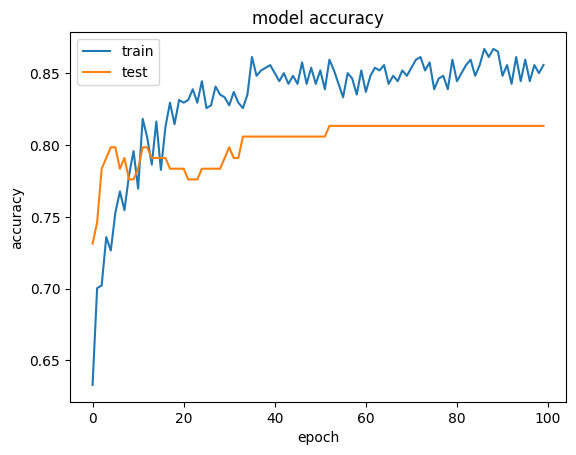

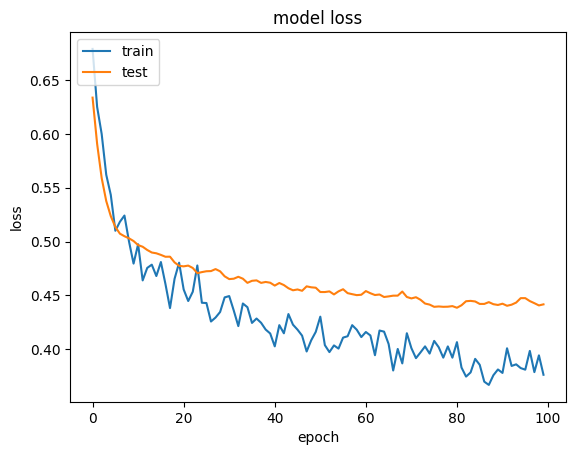

In [ ]:
# summarize the history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


**Test Predictions**

In [ ]:
# df_test = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/2022/DL/data/cancer_data_test.csv')

# # summarise the details
# print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
X_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred1 = model1.predict(X_test_scaled)
#print(test_pred1)

test_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in test_pred1]
print(test_pred_categorical1)

test_pred_encoded1 = le.inverse_transform(test_pred_categorical1)
print(test_pred_encoded1[:2])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[1 0]


In [ ]:
# # Save results
# test_ids = df_test['id']
# output = pd.DataFrame({'id': test_ids, 'Diabetes_Prediction': test_pred1.flatten()})
# output.to_csv("diabetes_predictions.csv", index=False)

# print("\nPredictions saved to diabetes_predictions.csv ✅")


Predictions saved to diabetes_predictions.csv ✅


In [ ]:
# Create a DataFrame
predictions_df = pd.DataFrame({
    'raw_predictions': test_pred1.flatten(),  # Flatten the array if necessary
    'categorical_predictions': test_pred_categorical1,
    'encoded_predictions': test_pred_encoded1
})

predictions_df.head()

,raw_predictions,categorical_predictions,encoded_predictions
0,0.616668,1,1
1,0.162725,0,0
2,0.867012,1,1
3,0.000567,0,0
4,0.005257,0,0


In [ ]:
print(predictions_df['encoded_predictions'].value_counts())

encoded_predictions
0    79
1    21
Name: count, dtype: int64
